In [ ]:
#Upload the data files
from google.colab import files

uploaded = files.upload()


Saving order_details.csv to order_details.csv
Saving orders.csv to orders.csv
Saving pizza_types.csv to pizza_types.csv
Saving pizzas.csv to pizzas.csv


In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#loading the data

orders = pd.read_csv('orders.csv', encoding='latin1')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')
pizzas = pd.read_csv('pizzas.csv', encoding='latin1')
order_details = pd.read_csv('order_details.csv', encoding='latin1')

In [14]:
#getting information and shape of the dataset

from io import StringIO

def info_to_df(df):
    buffer = StringIO()
    df.info(buf=buffer)
    s = buffer.getvalue()
    lines = s.split('\n')
    data = []
    for line in lines:
        if ('non-null' in line or 'RangeIndex' in line) and line.strip() != '':
            data.append(line.strip().split())
    info_df = pd.DataFrame(data)
    return info_df

# For order_details
info_od = info_to_df(order_details)
desc_od = order_details.describe()

# For orders
info_ord = info_to_df(orders)
desc_ord = orders.describe()

# For pizza_types
info_pt = info_to_df(pizza_types)
desc_pt = pizza_types.describe(include='all')

# For pizzas
info_piz = info_to_df(pizzas)
desc_piz = pizzas.describe()

# Display as tables
print("Order Details Info:")
display(info_od)
print("Order Details Describe:")
display(desc_od)

print("Orders Info:")
display(info_ord)
print("Orders Describe:")
display(desc_ord)

print("Pizza Types Info:")
display(info_pt)
print("Pizza Types Describe:")
display(desc_pt)

print("Pizzas Info:")
display(info_piz)
print("Pizzas Describe:")
display(desc_piz)



Order Details Info:


,0,1,2,3,4,5
0,RangeIndex:,48620,"entries,",0,to,48619
1,0,order_details_id,48620,non-null,int64,None
2,1,order_id,48620,non-null,int64,None
3,2,pizza_id,48620,non-null,object,None
4,3,quantity,48620,non-null,int64,None


Order Details Describe:


,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


Orders Info:


,0,1,2,3,4,5
0,RangeIndex:,21350,"entries,",0,to,21349
1,0,order_id,21350,non-null,int64,None
2,1,date,21350,non-null,object,None
3,2,time,21350,non-null,object,None


Orders Describe:


,order_id
count,21350.000000
mean,10675.500000
std,6163.358459
min,1.000000
25%,5338.250000
50%,10675.500000
75%,16012.750000
max,21350.000000


Pizza Types Info:


,0,1,2,3,4,5
0,RangeIndex:,32,"entries,",0,to,31
1,0,pizza_type_id,32,non-null,object,None
2,1,name,32,non-null,object,None
3,2,category,32,non-null,object,None
4,3,ingredients,32,non-null,object,None


Pizza Types Describe:


,pizza_type_id,name,category,ingredients
count,32,32,32,32
unique,32,32,4,32
top,bbq_ckn,The Barbecue Chicken Pizza,Veggie,"Barbecued Chicken, Red Peppers, Green Peppers,..."
freq,1,1,9,1


Pizzas Info:


,0,1,2,3,4,5
0,RangeIndex:,96,"entries,",0,to,95
1,0,pizza_id,96,non-null,object,None
2,1,pizza_type_id,96,non-null,object,None
3,2,size,96,non-null,object,None
4,3,price,96,non-null,float64,None


Pizzas Describe:


,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [15]:
#checking the columns
print("Columns in order_details:", order_details.columns)
print("Columns in orders:", orders.columns)
print("Columns in pizza_types:", pizza_types.columns)
print("Columns in pizzas:", pizzas.columns)


Columns in order_details: Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Columns in orders: Index(['order_id', 'date', 'time'], dtype='object')
Columns in pizza_types: Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')
Columns in pizzas: Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')


In [16]:
#displaying first few rows of each column
print(order_details.head())
print(orders.head())
print(pizza_types.head())
print(pizzas.head())

   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chic

In [19]:
# Checking for missing values in all datasets
print(order_details.isnull().sum())
print(orders.isnull().sum())
print(pizza_types.isnull().sum())
print(pizzas.isnull().sum())



order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64
order_id    0
date        0
time        0
dtype: int64
pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64
pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64


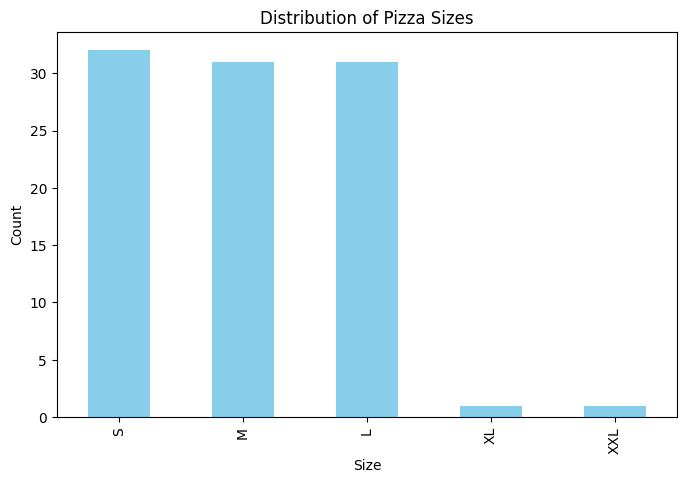

In [20]:
#visualizations- distribution of pizza sizes

size_counts = pizzas['size'].value_counts()
plt.figure(figsize=(8,5))
size_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Pizza Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

From the above plot, we can say that people have order small size pizza the most followed by medium and large. Very few people have ordered extra large and extra extra large .

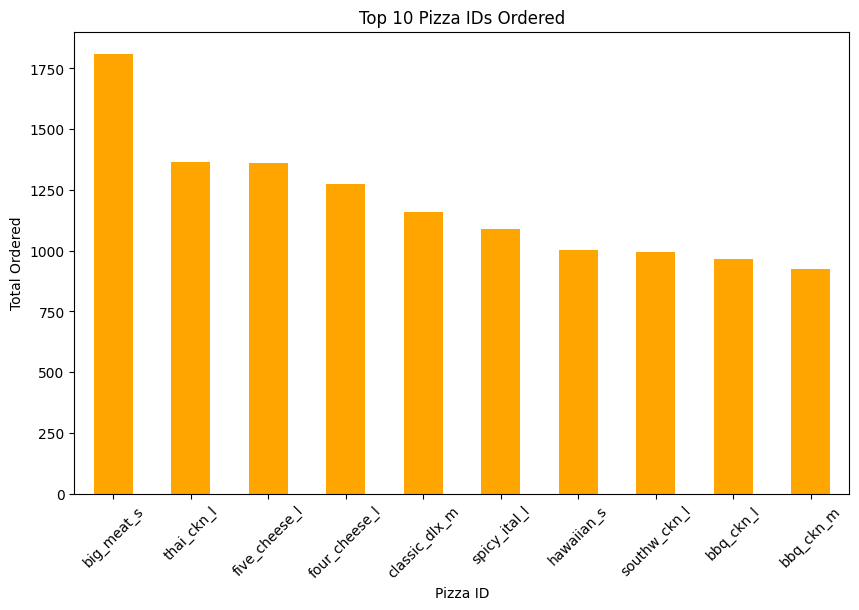

In [21]:
#visualization-distribution of top pizza ordered

top_pizzas = order_details['pizza_id'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_pizzas.plot(kind='bar', color='orange')
plt.title('Top 10 Pizza IDs Ordered')
plt.xlabel('Pizza ID')
plt.ylabel('Total Ordered')
plt.xticks(rotation=45)
plt.show()

From the plot abaove , we can say that big_meat pizza small size is the most ordered among all.

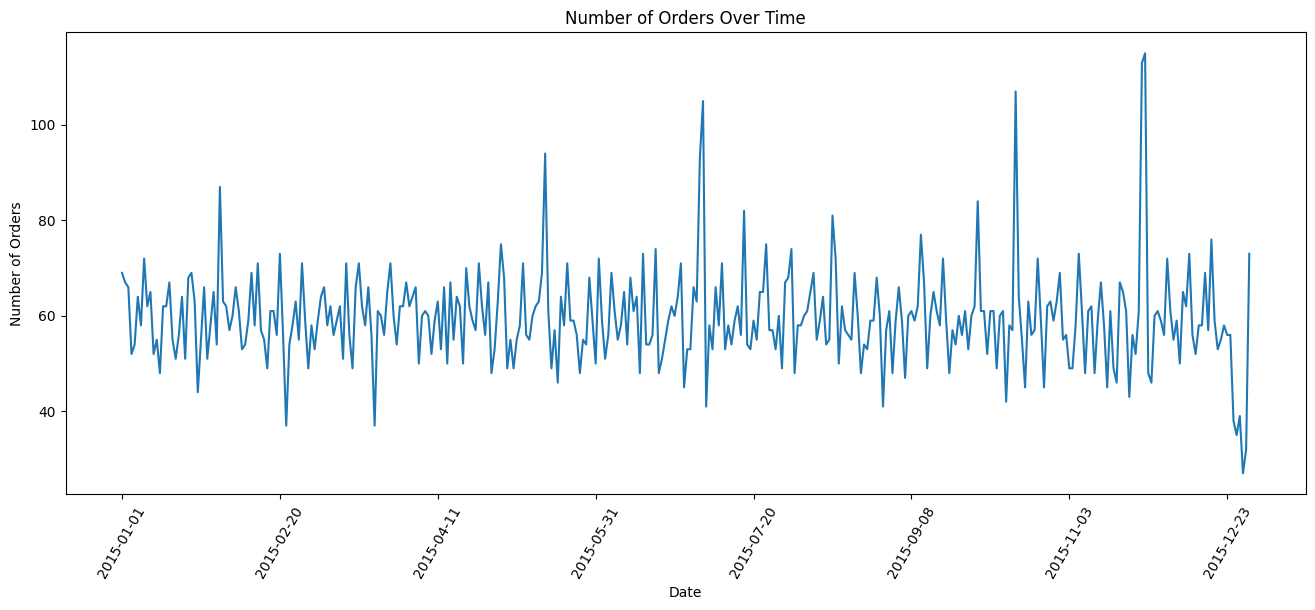

In [22]:
#visualization-plot of number of number of orders per day

order_dates = orders['date'].value_counts().sort_index()
plt.figure(figsize=(16,6))
order_dates.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=60)
plt.show()

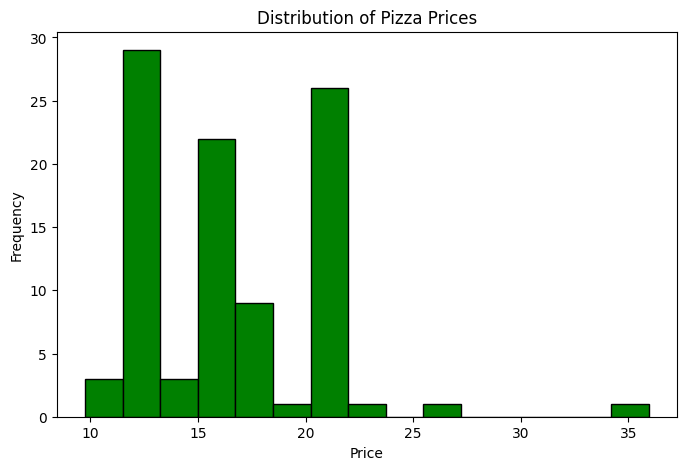

In [23]:
#visualization- histogram of pizza prices

plt.figure(figsize=(8,5))
plt.hist(pizzas['price'], bins=15, color='green', edgecolor='black')
plt.title('Distribution of Pizza Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

From the above plot, we can say that people have ordered most from the lower price range.